<h1><center>Image caption</center></h1>

In [1]:
from IPython.display import Image
from keras.models import load_model
from pickle import dump
from src.preprocessing.preprocess_images import (
    extract_features,
    extract_feature
)
from src.preprocessing.preprocess_text import (
    load_doc, 
    load_descriptions,
    clean_descriptions,
    to_vocabulary,
    save_descriptions
)
from src.model.model import (
    load_set,
    load_clean_descriptions,
    load_photo_features,
    create_tokenizer,
    max_length,
    define_model,
    train_model,
    evaluate_model,
    generate_desc,
    loading_train_model
)

Using TensorFlow backend.


### Preprocess images

In [ ]:
# directory = './data/Flicker8k_Dataset'
# features = extract_features(directory)
# print('Extracted Features: %d' % len(features))
# dump(features, open('./src/files/features.pkl', 'wb'))

### Preprocess text

In [2]:
filename = './data/Flickr8k.token.txt'
doc = load_doc(filename)
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))

clean_descriptions(descriptions)
vocabulary = to_vocabulary(descriptions)
print('Vocabulary Size: %d' % len(vocabulary))
save_descriptions(descriptions, './src/files/descriptions.txt')

Loaded: 8092 
Vocabulary Size: 8763


### Carga de datos para entrenar

In [3]:
filename_train = './data/Flickr_8k.trainImages.txt'
filename_val = './data/Flickr_8k.devImages.txt'
filename_test = './data/Flickr_8k.testImages.txt'
descriptions_path = './src/files/descriptions.txt'
features_path = './src/files/features.pkl'

train = load_set(filename_train)
val = load_set(filename_val)
test = load_set(filename_test)

train_descriptions = load_clean_descriptions(descriptions_path, train)
val_descriptions = load_clean_descriptions(descriptions_path, val)
test_descriptions = load_clean_descriptions(descriptions_path, test)

train_features = load_photo_features(features_path, train)
val_features = load_photo_features(features_path, val)
test_features = load_photo_features(features_path, test)

tokenizer = create_tokenizer(train_descriptions)
dump(tokenizer, open('./src/files/tokenizer.pkl', 'wb'))

### Definición de parámetros de entrenamiento

In [4]:
vocab_size = len(tokenizer.word_index) + 1
max_length = max_length(train_descriptions)
model = define_model(vocab_size, max_length)
epochs = 2
batch_size = 64

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 34)           0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 34, 256)      1940224     input_2[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 4096)         0           input_1[0][0]                    
____________________________________________________________________________________________

### Entrenamiento

In [ ]:
# entrena el modelo con carga progresiva
# loading_train_model(model, epochs, train_descriptions, 
#                     train_features, tokenizer, max_length, 
#                     vocab_size, val_descriptions, val_features)

# entrena el modelo cargando todo completo
# train_model(tokenizer, max_length, train_descriptions, 
#             train_features, vocab_size, test_descriptions, 
#             test_features)

### Evaluación del Modelo

In [5]:
model_path = 'C:/Users/atamayop/Desktop/image_caption/src/files/model-ep003-loss3.659-val_loss3.837.h5'
model = load_model(model_path)
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

BLEU-1: 0.558866
BLEU-2: 0.298919
BLEU-3: 0.197759
BLEU-4: 0.086204


### Generación de descripciones individuales

startseq dog is running through the snow endseq


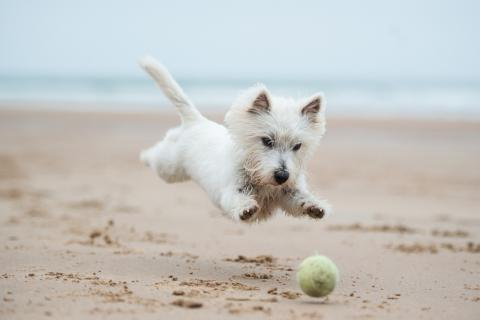

In [6]:
# tokenizer = load(open('./src/files/tokenizer.pkl', 'rb'))
# model = load_model('C:/Users/atamayop/Desktop/image_caption/src/files/model_0rms.h5')
photo_path = 'C:/Users/atamayop/Downloads/perro.jpg'
photo = extract_feature(photo_path)
description = generate_desc(model, tokenizer, photo, max_length)
print(description)
Image(filename=photo_path) 

---